# <font color='green'>**PATTERN RECOGNITION & MACHINE LEARNING BONUS PROJECT**</font>
## <font color='lightblue'>NAME - DIVYAM PATEL</font>
## <font color='lightblue'>ROLL NO. - B20EE082</font>






## Installing Libraries and Dependencies

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB

## Dataset Description

In [3]:
train = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/PRML Bonus Project/train.xlsx')
print("Shape of train :", train.shape)

Shape of train : (10683, 11)


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Check for null values

In [6]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train.dropna(inplace=True)
# checking the new shape of the data
train.shape

(10682, 11)

## Exploratory Data Analysis

In [8]:
def countplot(cat_features):
    ax=sns.countplot(x=train[cat_features],data=train,order=train[cat_features].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    for rect in ax.patches:
        ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 10)

In [9]:
plt.rcParams['figure.figsize'] = (19, 8)

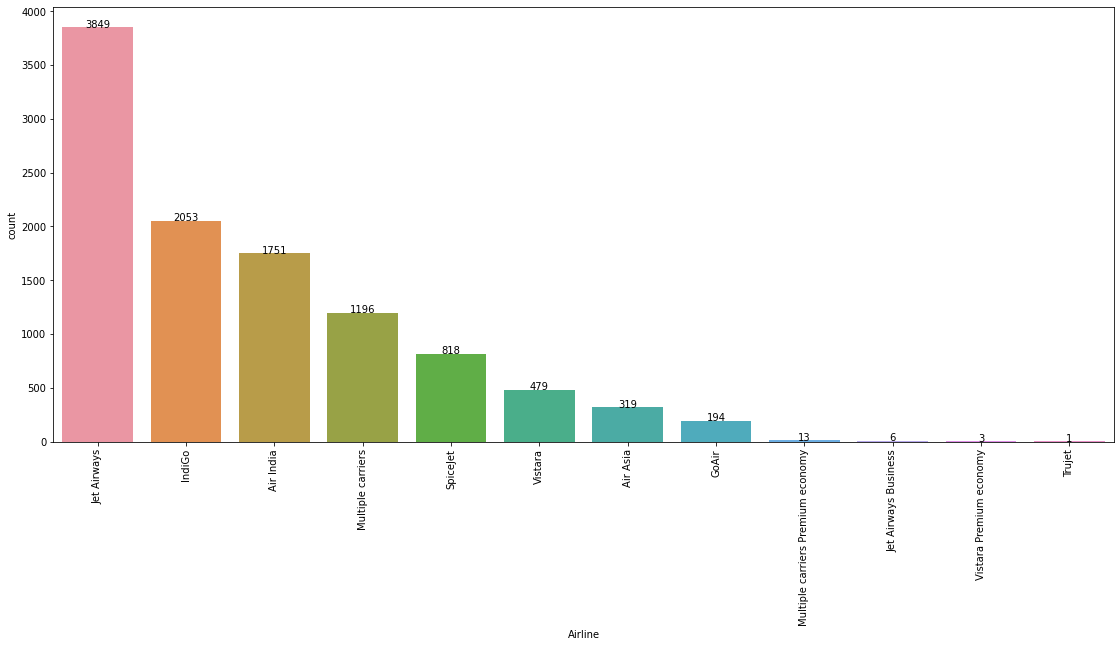

In [10]:
countplot('Airline')

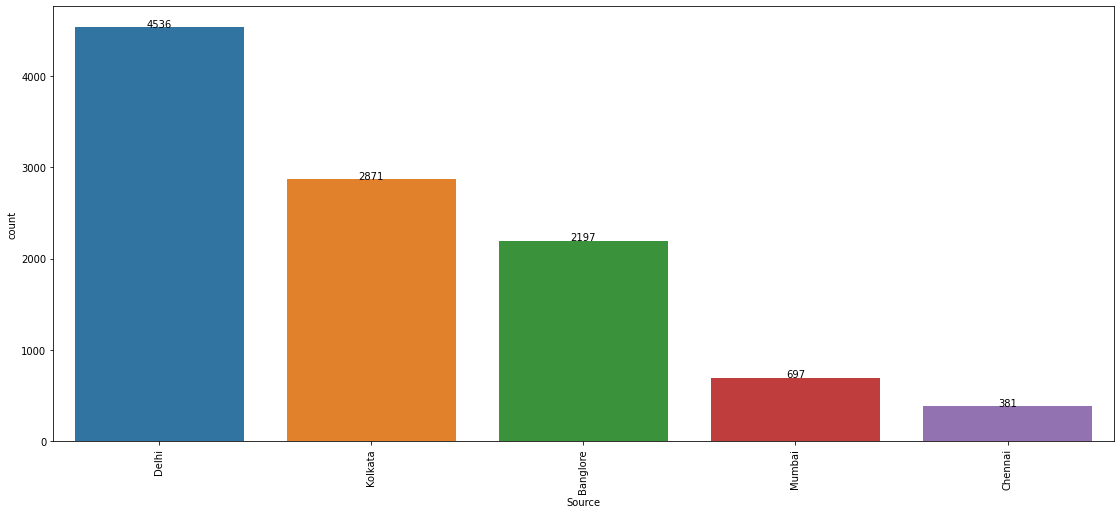

In [11]:
countplot('Source')

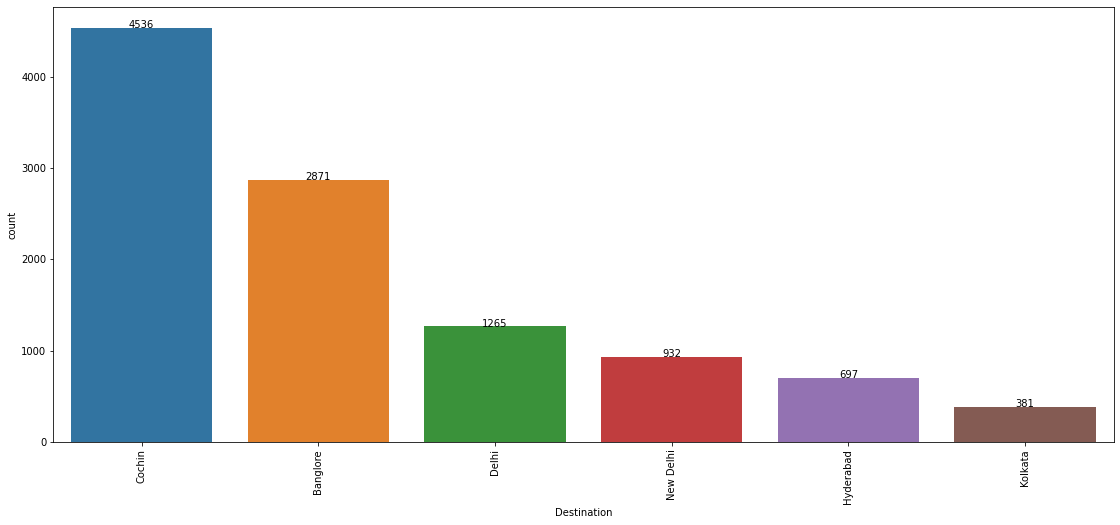

In [12]:
countplot('Destination')

In [13]:
def countplot_hue(cat_features):
    ax=sns.countplot(x=cat_features,data=train,hue='Total_Stops')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

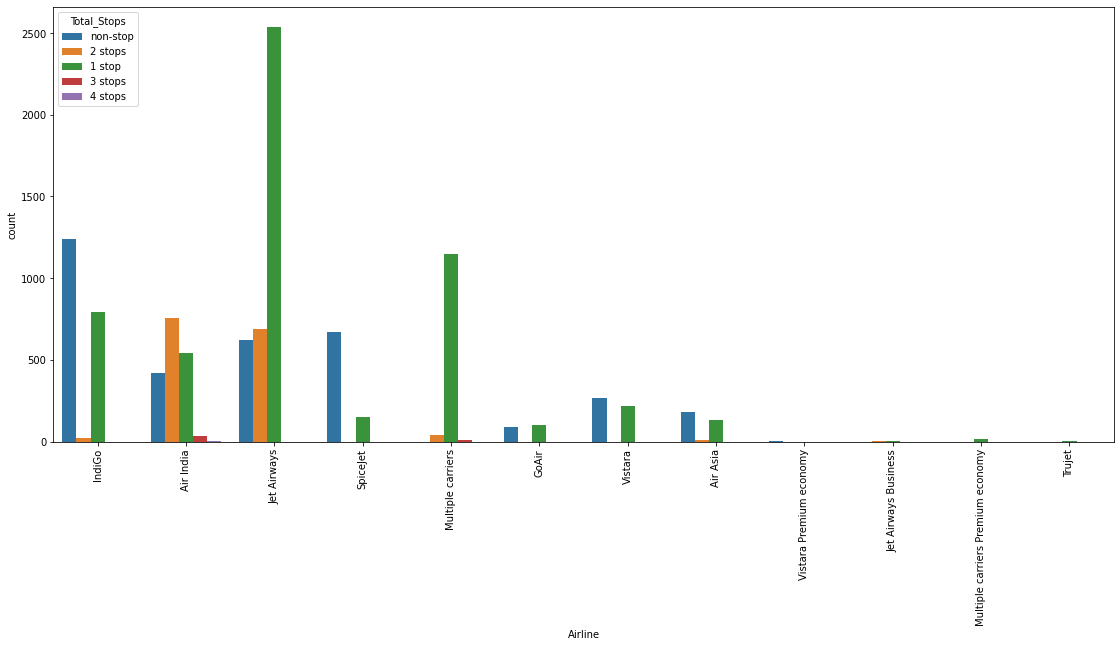

In [14]:
countplot_hue('Airline')

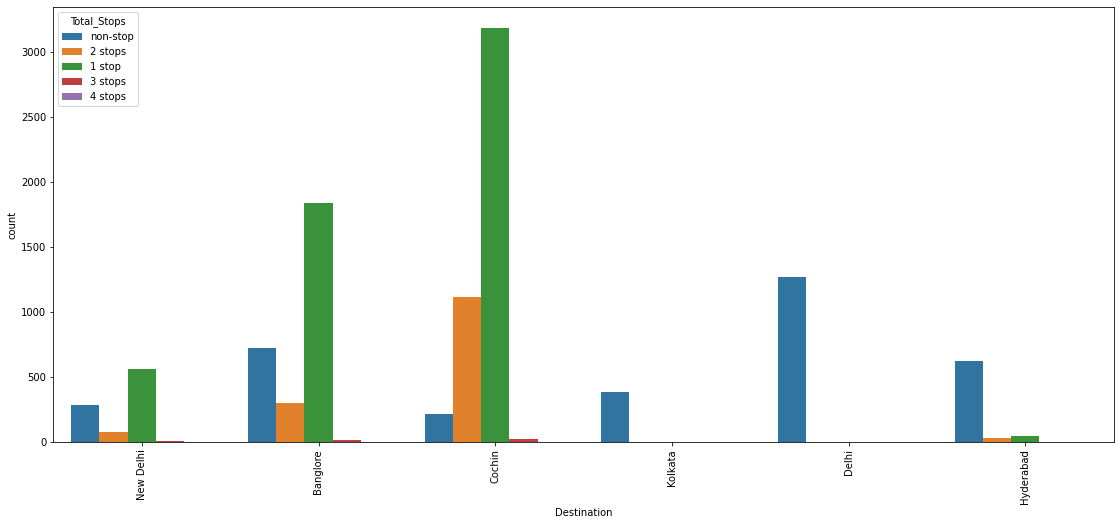

In [15]:
countplot_hue('Destination')

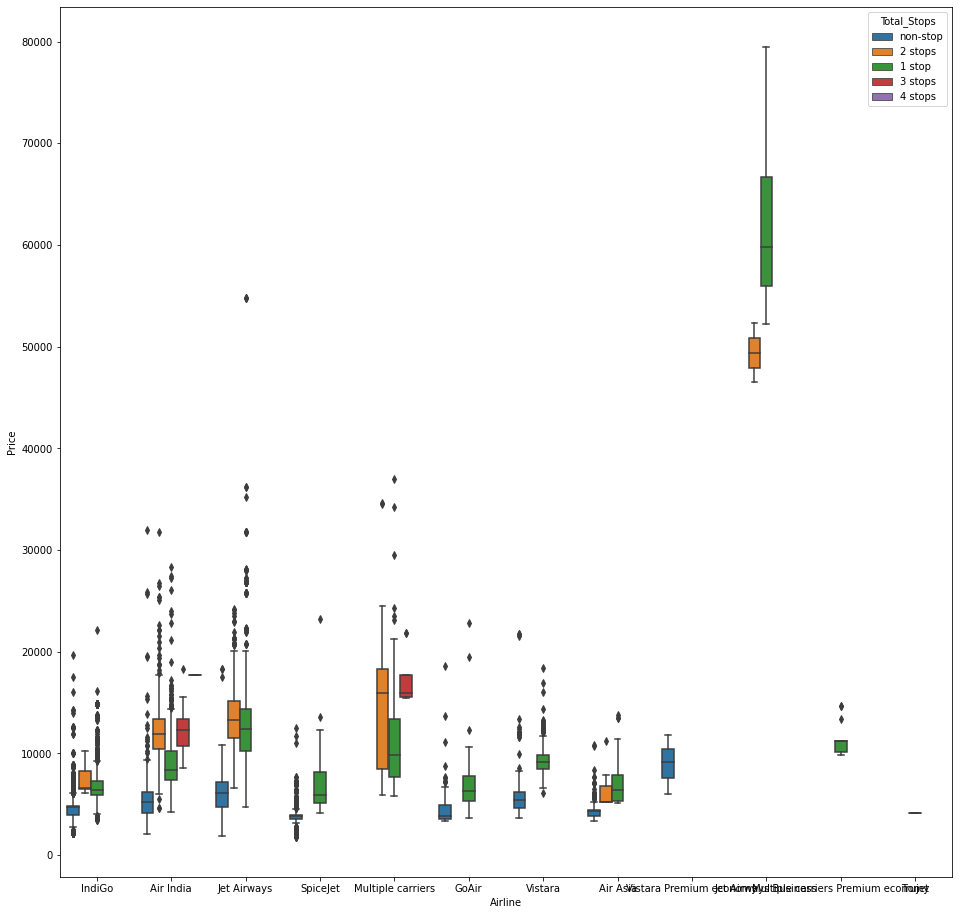

In [16]:
fig=plt.figure(1,(16,16))
sns.boxplot(x='Airline',y=train['Price'],data=train,hue='Total_Stops')

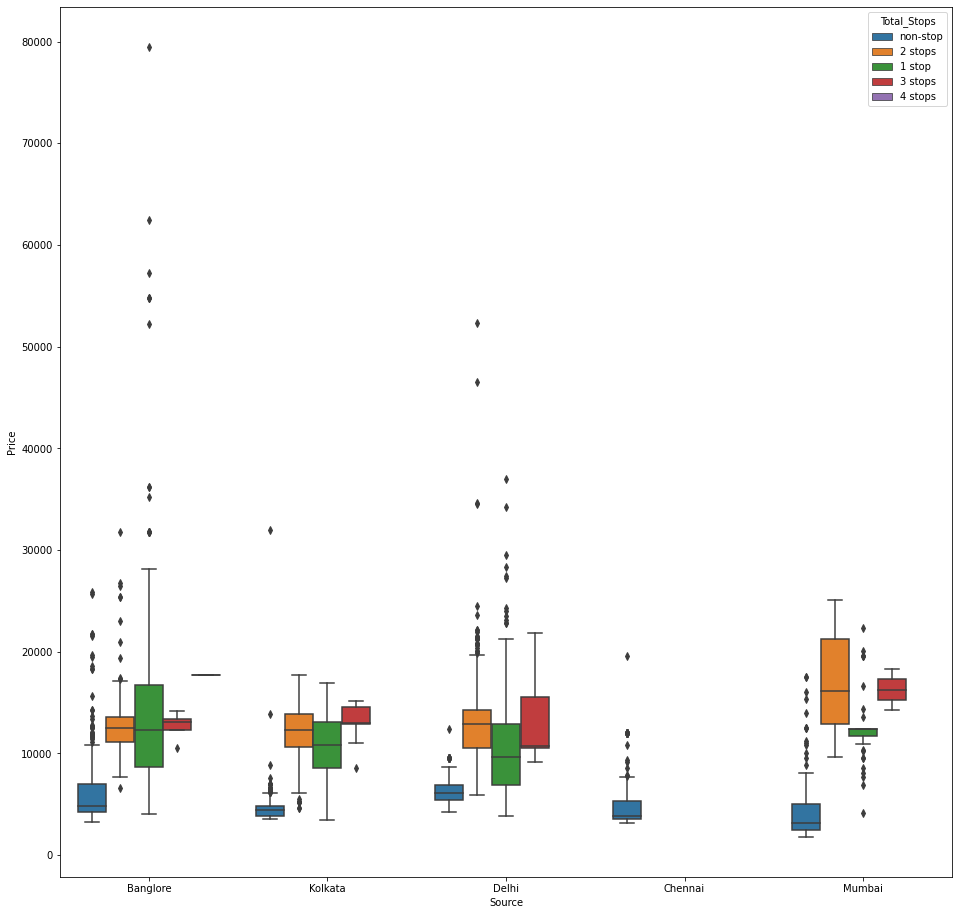

In [17]:
fig=plt.figure(1,(16,16))
sns.boxplot(x='Source',y=train['Price'],data=train,hue='Total_Stops')

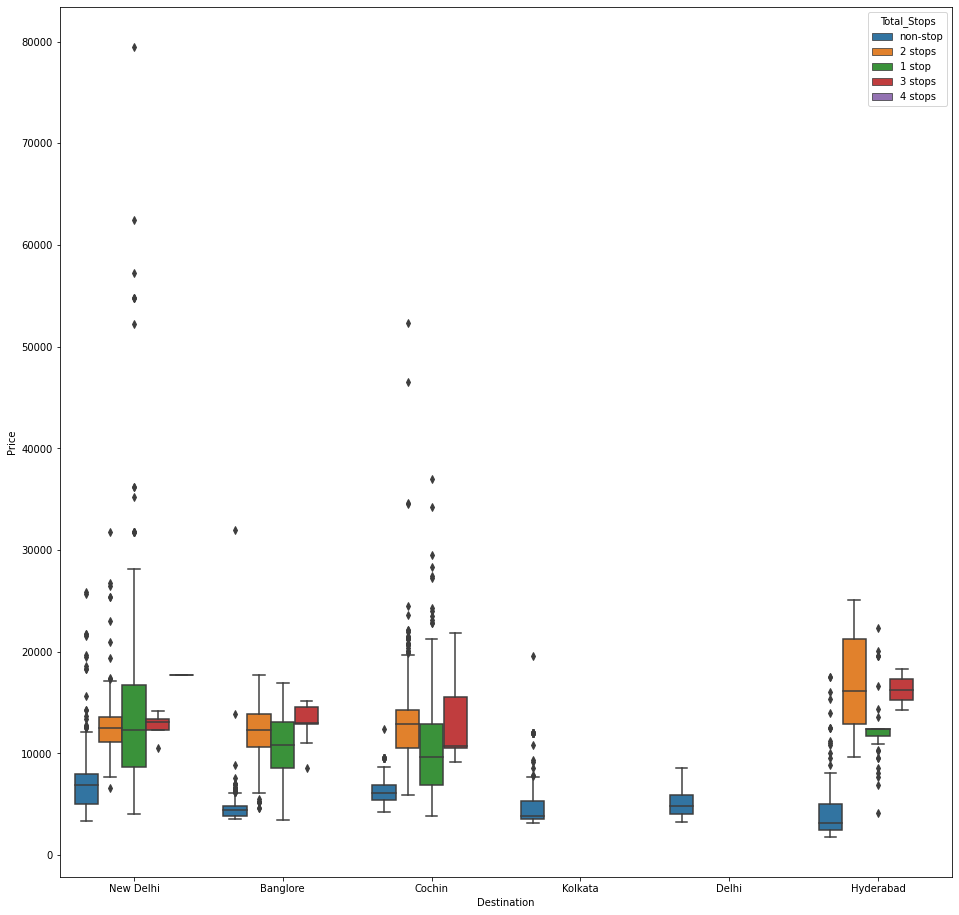

In [18]:
fig=plt.figure(1,(16,16))
sns.boxplot(x='Destination',y='Price',data=train,hue='Total_Stops')

## Data Preprocessing

In [19]:
# Date_of_Journey
train["Journey_Day"] = train['Date_of_Journey'].str.split('/').str[0].astype(int)
train["Journey_Month"] = train['Date_of_Journey'].str.split('/').str[1].astype(int)
train.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [20]:
train["Dep_hour"] = pd.to_datetime(train["Dep_Time"]).dt.hour     # Extracting Hours
train["Dep_min"] = pd.to_datetime(train["Dep_Time"]).dt.minute    # Extracting Minutes
train.drop(["Dep_Time"], axis = 1, inplace = True)                

In [21]:
train["Arrival_hour"] = pd.to_datetime(train.Arrival_Time).dt.hour            # Extracting Hours
train["Arrival_min"] = pd.to_datetime(train.Arrival_Time).dt.minute           # Extracting Minutes
train.drop(["Arrival_Time"], axis = 1, inplace = True)

Splitting Flight Duration into Hours and Minutes

In [22]:
# Assigning and converting Duration column into list
duration = list(train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration


# Adding duration_hours and duration_mins list to train_data dataframe
train["Duration_hours"] = duration_hours
train["Duration_mins"] = duration_mins
train.drop(["Duration"], axis = 1, inplace = True)

In [23]:
train

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


In [24]:
train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [25]:
train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)                # Values are assigned with corresponding keys

In [26]:
train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

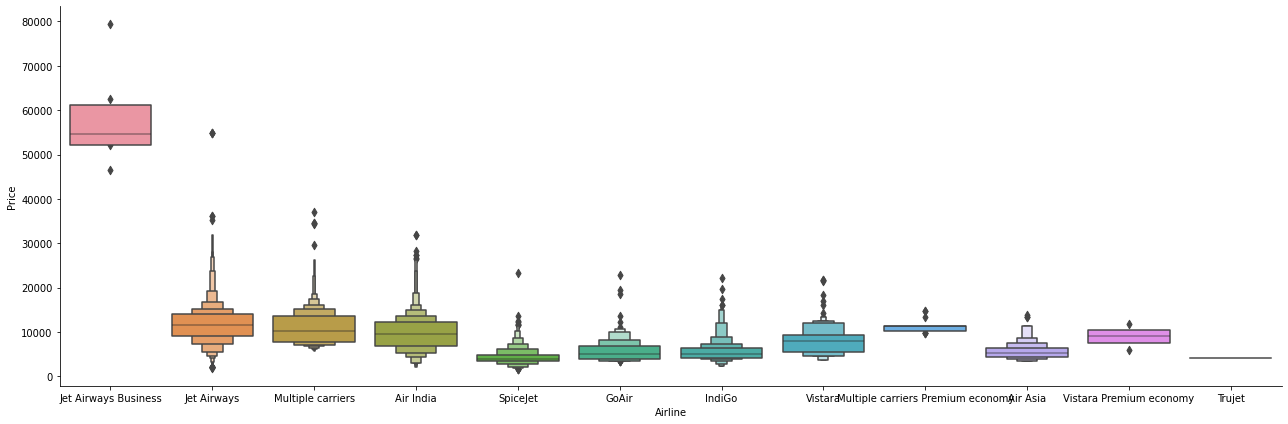

In [27]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

Changed Multiple carriers Premium economy, Jet Airways Business, Vistara Premium economy to Multiple carriers, Jet Airways, Vistara respectively.

We need to drop Trujet because Airline feature has high cardinality and this record is present only 1 time so our model cant learn enough.

In [28]:
Airline_Dict={'Multiple carriers Premium economy':'Multiple carriers' ,
              'Jet Airways Business':'Jet Airways',
              'Vistara Premium economy':'Vistara'}

train['Airline'] = train['Airline'].replace(Airline_Dict)

In [29]:
train[train['Airline']=='Trujet']

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
2878,Trujet,Mumbai,Hyderabad,BOM → NDC → HYD,1,No info,4140,6,3,13,5,16,20,3,15


In [30]:
train.iloc[2878]

Airline                     Trujet
Source                      Mumbai
Destination              Hyderabad
Route              BOM → NDC → HYD
Total_Stops                      1
Additional_Info            No info
Price                         4140
Journey_Day                      6
Journey_Month                    3
Dep_hour                        13
Dep_min                          5
Arrival_hour                    16
Arrival_min                     20
Duration_hours                   3
Duration_mins                   15
Name: 2878, dtype: object

In [31]:
train.drop(train.index[2878],inplace=True)

In [32]:
Airline = train[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara
0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [33]:
train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

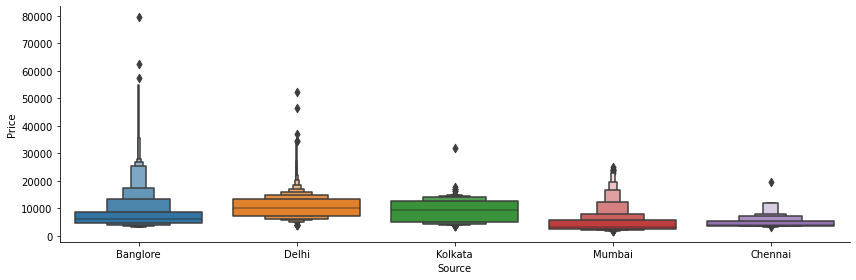

In [34]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [35]:
Source = train[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [36]:
train["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [37]:
Destination = train[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [38]:
train['Additional_Info'].value_counts()

No info                         8343
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [39]:
train.drop(['Additional_Info'],axis=1,inplace=True)

Dropping Route because Total_Stops and Route are correlated.

In [40]:
train.drop(['Route'],axis=1,inplace=True)

In [41]:
train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [42]:
train = pd.concat([train, Airline, Source, Destination], axis = 1)                                     # Concatenate dataframe --> train + Airline + Source + Destination

In [43]:
first_column = train.pop('Price')
train.insert(0, 'Price', first_column)

In [44]:
train

,Price,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3897,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,7662,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,13882,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
3,6218,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,13302,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4107,0,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,4145,0,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,7229,0,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
10681,12648,0,1,3,11,30,14,10,2,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


## Feature Selection

Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

1. **heatmap**
2. **feature_importance_**
3. **SelectKBest**

In [45]:
X = train.iloc[: , 1:]
X.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [46]:
y = train.iloc[:, 0]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Price                      10681 non-null  int64
 1   Total_Stops                10681 non-null  int64
 2   Journey_Day                10681 non-null  int64
 3   Journey_Month              10681 non-null  int64
 4   Dep_hour                   10681 non-null  int64
 5   Dep_min                    10681 non-null  int64
 6   Arrival_hour               10681 non-null  int64
 7   Arrival_min                10681 non-null  int64
 8   Duration_hours             10681 non-null  int64
 9   Duration_mins              10681 non-null  int64
 10  Airline_Air India          10681 non-null  uint8
 11  Airline_GoAir              10681 non-null  uint8
 12  Airline_IndiGo             10681 non-null  uint8
 13  Airline_Jet Airways        10681 non-null  uint8
 14  Airline_Multiple carri

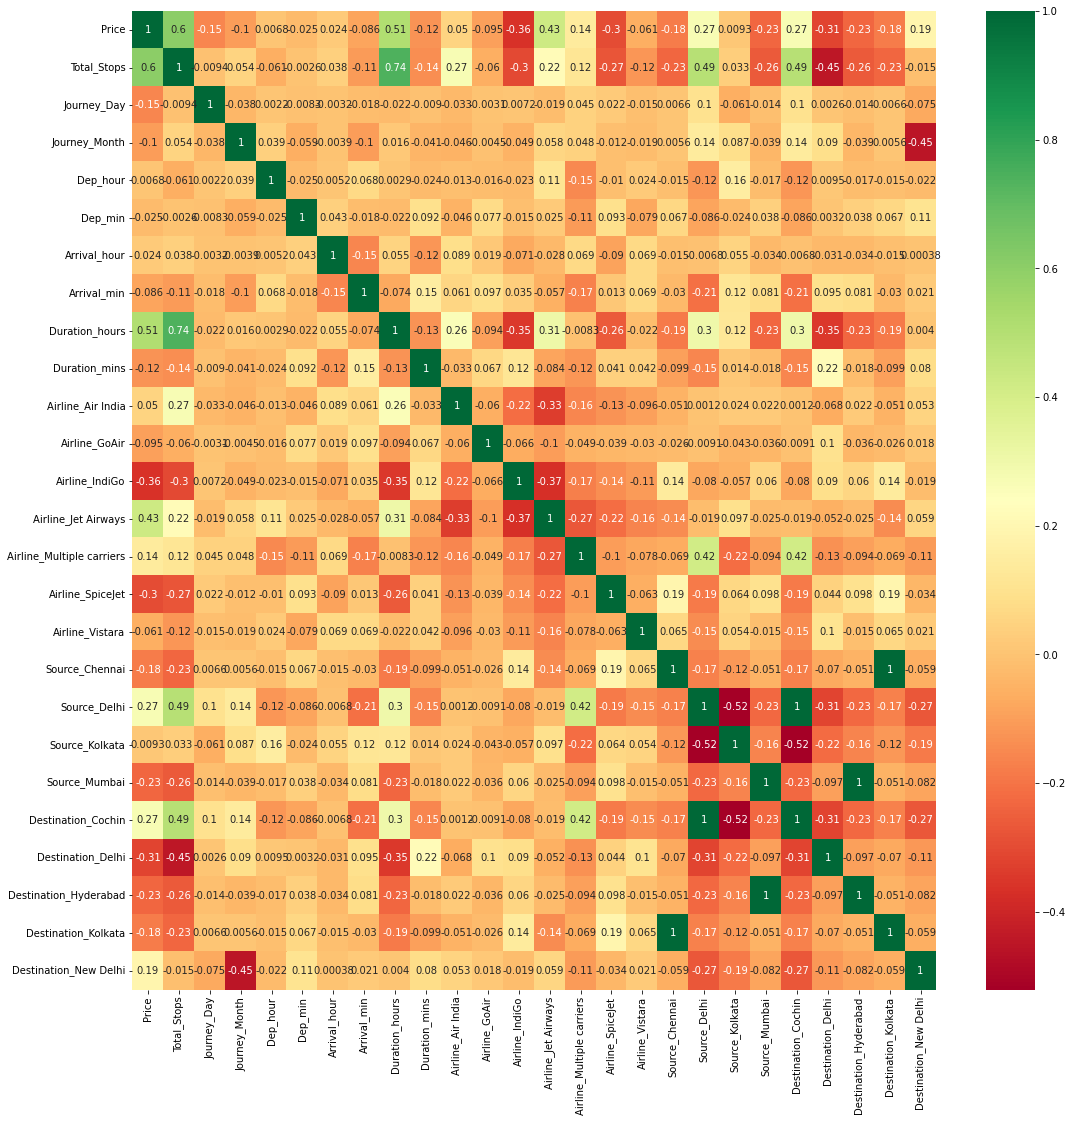

In [48]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [49]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [50]:
print(selection.feature_importances_)

[0.21507664 0.1647033  0.05642144 0.02777319 0.03000373 0.02785967
 0.02084772 0.1359783  0.0206427  0.01475276 0.00160238 0.01242943
 0.1510181  0.02258086 0.00221045 0.00551916 0.0006193  0.01235217
 0.00363502 0.00693602 0.00978953 0.02031599 0.00704746 0.00044221
 0.02944246]


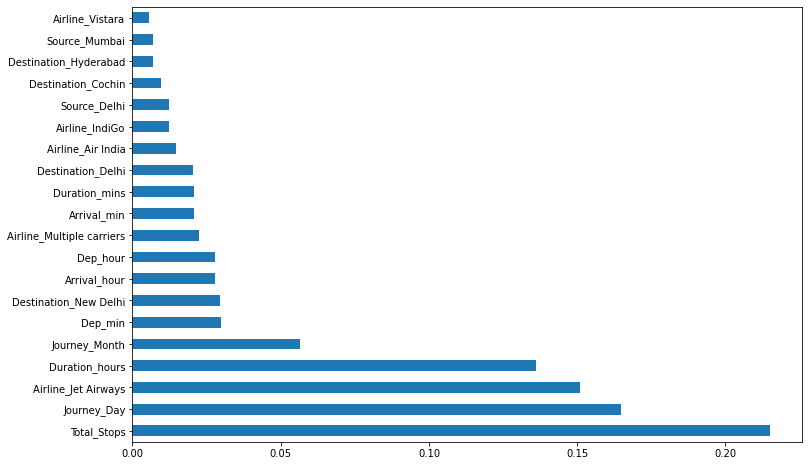

In [51]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Splitting The Dataset

In [52]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 42)

In [54]:
def predict(model_name):
    print('Model: {}'.format(model_name))
    model = model_name.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    print("Test score: {}".format(model.score(X_test,y_test)))
    predictions = model.predict(X_test)
    r2score = r2_score(y_test,predictions) 
    print("R2 score: {}".format(r2score))
    print('MAE: {}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE: {}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
    plt.figure(figsize=(5,5),facecolor='white')
    sns.distplot(y_test)
    sns.distplot(predictions)
    sns.distplot(y_test-predictions)
    plt.legend(labels=["y_test","y_pred","difference"])
    plt.show()
    return model

## Applying ML Models

### Random Forest Regressor

Model: RandomForestRegressor()
Training score: 0.9531631640173462
Test score: 0.7634729682677877
R2 score: 0.7634729682677877
MAE: 1215.1561203096546
MSE: 5234570.57761814
RMSE: 2287.9183940031908


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

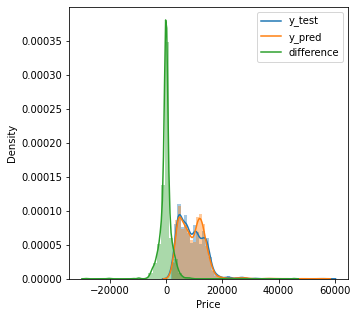

RandomForestRegressor()

In [55]:
predict(RandomForestRegressor())

Hyperparameter tuning

In [56]:
reg_rf = RandomForestRegressor()

In [57]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]           # Number of trees in random forest
max_features = ['auto', 'sqrt']                                                            # Number of features to consider at every split                                                                        
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]                                  # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 15, 100]                                                    # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 5, 10]                                                           # Minimum number of samples required at each leaf node

In [58]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [59]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [60]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [61]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

Model: RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)
Training score: 0.8878138066450793
Test score: 0.7849933945889233
R2 score: 0.7849933945889233
MAE: 1186.0496879664636
MSE: 4758302.856278137
RMSE: 2181.353445977551


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

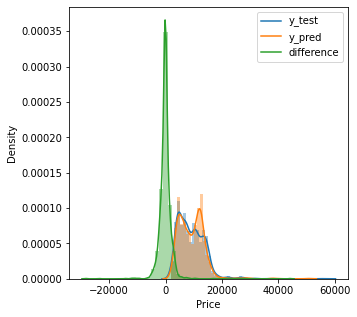

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [62]:
predict(RandomForestRegressor(max_depth = 20, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 15, n_estimators = 700))

### Decision Tree Regressor

Model: DecisionTreeRegressor()
Training score: 0.9695494818905883
Test score: 0.5858127393438224
R2 score: 0.5858127393438224
MAE: 1434.8248245203556
MSE: 9166362.222436048
RMSE: 3027.600076370069


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

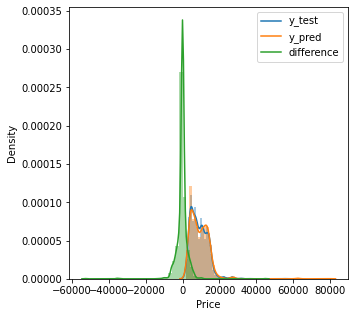

DecisionTreeRegressor()

In [63]:
predict(DecisionTreeRegressor())

### Gradient Boosting Regressor

Model: GradientBoostingRegressor()
Training score: 0.7550135897581932
Test score: 0.7690485347930309
R2 score: 0.7690485347930309
MAE: 1501.840668701311
MSE: 5111177.930812197
RMSE: 2260.791439034613


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

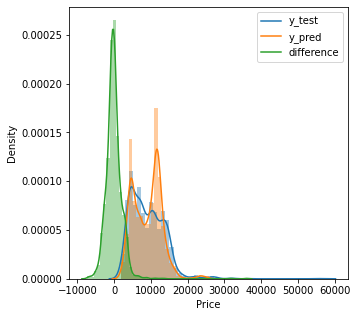

GradientBoostingRegressor()

In [64]:
predict(GradientBoostingRegressor())

Hyperparameter tuning

Model: GradientBoostingRegressor(learning_rate=0.3, loss='ls', max_depth=7,
                          min_samples_split=30, n_estimators=380,
                          random_state=0, verbose=100)
      Iter       Train Loss   Remaining Time 
         1    12882893.0851            9.44s
         2     8548299.9226            8.34s
         3     6427767.5785            7.88s
         4     5114505.3511            7.61s
         5     4348562.2314            7.59s
         6     3876066.4284            7.46s
         7     3555157.4487            7.39s
         8     3381512.0577            7.36s
         9     3238670.5617            7.31s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


        10     3085204.5812            7.30s
        11     2999298.6505            7.32s
        12     2912492.2378            7.28s
        13     2800539.3306            7.27s
        14     2655126.9648            7.23s
        15     2581762.3351            7.22s
        16     2500048.1061            7.20s
        17     2477431.6216            7.19s
        18     2412804.9079            7.15s
        19     2345035.9583            7.14s
        20     2272690.6544            7.11s
        21     2233068.6249            7.11s
        22     2204349.4916            7.10s
        23     2169560.1677            7.07s
        24     2122894.2533            7.04s
        25     2111522.2813            7.02s
        26     2061272.7163            7.02s
        27     2030108.4733            7.01s
        28     2007783.2757            6.98s
        29     1984934.1184            6.96s
        30     1968856.7089            6.94s
        31     1946213.9726            6.92s
        32

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

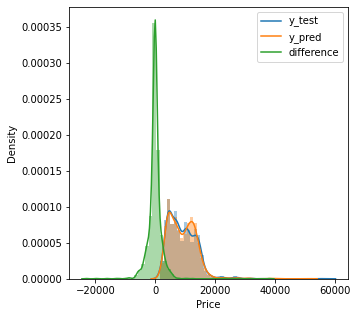

GradientBoostingRegressor(learning_rate=0.3, loss='ls', max_depth=7,
                          min_samples_split=30, n_estimators=380,
                          random_state=0, verbose=100)

In [65]:
predict(GradientBoostingRegressor(loss='ls', learning_rate=0.3, n_estimators=380, subsample=1.0, criterion='friedman_mse', min_samples_split=30, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=7, min_impurity_decrease=0.0, init=None, random_state=0, max_features=None, 
                               alpha=0.9, verbose=100, max_leaf_nodes=None, warm_start=False))

### Gaussian NB

Model: GaussianNB()
Training score: 0.4645365168539326
Test score: 0.2802994852597099
R2 score: 0.6785237363021752
MAE: 1503.8039307440338
MSE: 7114578.739822181
RMSE: 2667.3167678065874


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

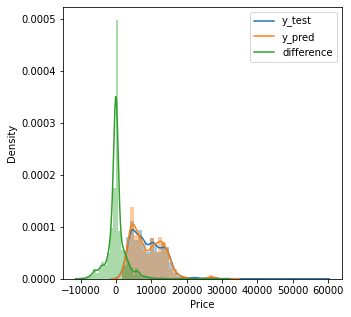

GaussianNB()

In [66]:
predict(GaussianNB())

### XG Boost Regressor

Model: XGBRegressor()
[07:46:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training score: 0.7493988228229898
Test score: 0.7617984681128507
R2 score: 0.7617984681128507
MAE: 1518.0551789800977
MSE: 5271628.875686894
RMSE: 2296.0028039370713


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

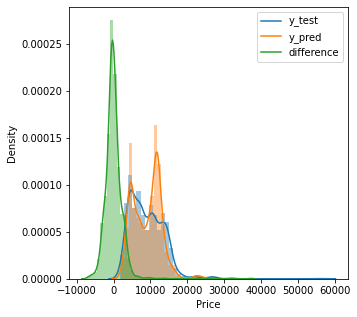

XGBRegressor()

In [67]:
predict(XGBRegressor())

Hyperparameter tuning

In [68]:
xgb_random = XGBRegressor()

In [69]:
random_grid = {
              'learning_rate': [0.01, 0.1],
              'max_depth': [3, 5, 7, 10],
              'min_child_weight': [1, 3, 5,7,9],
              'subsample': [0.3,0.5,0.7,0.9],
              'colsample_bytree': [0.5,0.7,0.9,1],
              'n_estimators' : [100, 200],
              'objective': ['reg:squarederror']
              }

In [70]:
xgb_random = RandomizedSearchCV(estimator = xgb_random, param_distributions = random_grid,scoring='neg_mean_absolute_error', n_iter = 10, cv = 5, verbose=2, random_state=1, n_jobs = -1)
xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.9, 1],
                                        'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_child_weight': [1, 3, 5, 7, 9],
                                        'n_estimators': [100, 200],
                                        'objective': ['reg:squarederror'],
                                        'subsample': [0.3, 0.5, 0.7, 0.9]},
                   random_state=1, scoring='neg_mean_absolute_error',
                   verbose=2)

In [71]:
xgb_random.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 200,
 'objective': 'reg:squarederror',
 'subsample': 0.9}

In [72]:
prediction_xgb = xgb_random.predict(X_test)

In [73]:
r2score_xgb_random = r2_score(y_test,prediction_xgb) 

### Linear Regression

Model: LinearRegression()
Training score: 0.5730261254053823
Test score: 0.5787910142769601
R2 score: 0.5787910142769601
MAE: 1979.9551973878793
MSE: 9321759.747910995
RMSE: 3053.1557031882594


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

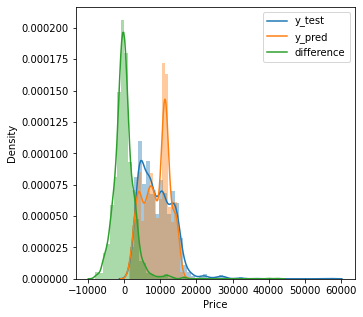

LinearRegression()

In [74]:
predict(LinearRegression())

### Scaling

In [75]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-1.22058845,  1.23719214, -1.46761891, ..., -0.26401621,
        -0.1923286 ,  3.23423877],
       [ 1.74138025, -1.47537531,  0.25016506, ..., -0.26401621,
        -0.1923286 , -0.30919177],
       [ 1.74138025, -0.53187359,  1.10905704, ..., -0.26401621,
        -0.1923286 , -0.30919177],
       ...,
       [-1.22058845,  1.59100529, -0.60872693, ..., -0.26401621,
        -0.1923286 , -0.30919177],
       [-1.22058845, -1.47537531, -1.46761891, ..., -0.26401621,
        -0.1923286 ,  3.23423877],
       [ 1.74138025, -0.53187359,  0.25016506, ..., -0.26401621,
        -0.1923286 , -0.30919177]])

In [76]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [77]:
X_scaled

,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,-1.220588,1.237192,-1.467619,1.654085,-0.235047,-1.800328,-0.890002,-0.970681,1.278944,-0.442810,-0.136011,2.050032,-0.751500,-0.357267,-0.287987,-0.217393,-0.192329,-0.859163,-0.606305,-0.264016,-0.859163,-0.366532,-0.264016,-0.192329,3.234239
1,1.741380,-1.475375,0.250165,-1.303044,1.363515,-0.050871,-0.587096,-0.382074,-0.196389,2.258305,-0.136011,-0.487797,-0.751500,-0.357267,-0.287987,-0.217393,-0.192329,-0.859163,1.649335,-0.264016,-0.859163,-0.366532,-0.264016,-0.192329,-0.309192
2,1.741380,-0.531874,1.109057,-0.607249,0.031380,-1.362964,0.018717,1.030584,-1.671722,-0.442810,-0.136011,-0.487797,1.330672,-0.357267,-0.287987,-0.217393,-0.192329,1.163923,-0.606305,-0.264016,1.163923,-0.366532,-0.264016,-0.192329,-0.309192
3,0.260396,-0.178060,0.250165,0.958290,-1.034329,1.407010,0.321624,-0.617517,-0.196389,-0.442810,-0.136011,2.050032,-0.751500,-0.357267,-0.287987,-0.217393,-0.192329,-0.859163,1.649335,-0.264016,-0.859163,-0.366532,-0.264016,-0.192329,-0.309192
4,0.260396,-1.475375,-1.467619,0.610392,1.363515,1.115434,0.624530,-0.735238,0.983878,-0.442810,-0.136011,2.050032,-0.751500,-0.357267,-0.287987,-0.217393,-0.192329,-0.859163,-0.606305,-0.264016,-0.859163,-0.366532,-0.264016,-0.192329,3.234239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,-1.220588,-0.531874,-0.608727,1.132239,1.629942,1.261222,0.018717,-0.970681,0.098678,-0.442810,-0.136011,-0.487797,-0.751500,-0.357267,-0.287987,-0.217393,-0.192329,-0.859163,1.649335,-0.264016,-0.859163,-0.366532,-0.264016,-0.192329,-0.309192
10677,-1.220588,1.591005,-0.608727,1.306188,1.097088,1.407010,-0.284189,-0.970681,0.393744,2.258305,-0.136011,-0.487797,-0.751500,-0.357267,-0.287987,-0.217393,-0.192329,-0.859163,1.649335,-0.264016,-0.859163,-0.366532,-0.264016,-0.192329,-0.309192
10678,-1.220588,1.591005,-0.608727,-0.781198,-0.235047,-0.342447,-0.284189,-0.852960,-1.671722,-0.442810,-0.136011,-0.487797,1.330672,-0.357267,-0.287987,-0.217393,-0.192329,-0.859163,-0.606305,-0.264016,-0.859163,2.728274,-0.264016,-0.192329,-0.309192
10679,-1.220588,-1.475375,-1.467619,-0.259352,0.297807,0.094917,-0.890002,-0.970681,0.688811,-0.442810,-0.136011,-0.487797,-0.751500,-0.357267,-0.287987,4.599973,-0.192329,-0.859163,-0.606305,-0.264016,-0.859163,-0.366532,-0.264016,-0.192329,3.234239


In [78]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = tts(X_scaled, y, test_size = 0.2, random_state = 42)

In [79]:
def predict_scaled(ml_model):
    print('Model: {}'.format(ml_model))
    model= ml_model.fit(X_train_scaled,y_train_scaled)
    print("Training score: {}".format(model.score(X_train_scaled,y_train_scaled)))
    print("Test score:{}".format(model.score(X_test_scaled,y_test_scaled)))
    predictions_scaled = model.predict(X_test_scaled)
    r2score=r2_score(y_test_scaled,predictions_scaled) 
    print("R2 score: {}".format(r2score))
    print('MAE: {}'.format(mean_absolute_error(y_test_scaled,predictions_scaled)))
    print('MSE: {}'.format(mean_squared_error(y_test_scaled,predictions_scaled)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test_scaled,predictions_scaled))))
    return model

### Support Vector Regression

In [80]:
predict_scaled(SVR(kernel = 'rbf'))

Model: SVR()
Training score: 0.05561792889950723
Test score:0.05584657410731653
R2 score: 0.05584657410731653
MAE: 3441.0432436912083
MSE: 20895022.897554643
RMSE: 4571.107403852446


SVR()

### K Nearest Neighbours

In [81]:
predict_scaled(KNeighborsRegressor())

Model: KNeighborsRegressor()
Training score: 0.8217864195936121
Test score:0.7718988536052838
R2 score: 0.7718988536052838
MAE: 1389.1501169864298
MSE: 5048097.635582593
RMSE: 2246.7971950273113


KNeighborsRegressor()

## Saving Model

In [82]:
import joblib
# Save the model as a pickle in a file
joblib.dump(xgb_random, 'flight_ticket_price.pkl')

['flight_ticket_price.pkl']

In [83]:
from google.colab import files
files.download('flight_ticket_price.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>